In [139]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [140]:
#supress scientific notation of values
pd.options.display.float_format = '{:.2f}'.format
#increasing max number of columns and rows  displayed with pandas.
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

In [141]:
loan_data = pd.read_csv('loan.csv', low_memory= False)
loan_data.shape

(39717, 111)

In [142]:
# analysis the data
loan_data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,acc_now_delinq.1,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

## Checking for Null Value in Data and dropping those columns

In [143]:
# Checking for data and cleaning the data 
loan_data.isnull().sum()/len(loan_data)*100

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
                              ...  
tax_liens                      0.10
tot_hi_cred_lim              100.00
total_bal_ex_mort            100.00
total_bc_limit               100.00
total_il_high_credit_limit   100.00
Length: 111, dtype: float64

In [144]:
# dropping column thats have NA value.
loan_data.dropna(axis=1,how='all', inplace=True)


In [145]:
loan_data.shape

(39717, 57)

In [146]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [147]:
loan_data.acc_now_delinq.value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

In [148]:
column_unique = loan_data.nunique()
print(column_unique)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [149]:
c1 = column_unique[column_unique.values == 1]
c1.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [150]:
# dropping column who have only 1 value
loan_data.drop(columns = list(c1.index), inplace=True)
# dropping columns who have most of the null value 
c2 = ['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq']
loan_data.drop(columns = list(c2), inplace=True)
loan_data.shape

(39717, 45)

In [151]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.00


# Removing field that not require like post loan field and that not require for our current requirement

In [152]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [153]:
remove_cols = ['id', "member_id", 'url', "zip_code", "out_prncp","out_prncp_inv", 'total_pymnt', 'total_pymnt_inv']
loan_data.drop(columns= remove_cols, inplace= True)
loan_data.shape

(39717, 37)

In [154]:
remove_col1 = ['last_credit_pull_d', 'total_rec_prncp', 
               'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_d','last_pymnt_amnt',
               'last_credit_pull_d', 'funded_amnt_inv']
loan_data.drop(columns= remove_col1, inplace= True)
loan_data.shape

(39717, 29)

In [155]:
loan_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   term                     39717 non-null  object 
 3   int_rate                 39717 non-null  object 
 4   installment              39717 non-null  float64
 5   grade                    39717 non-null  object 
 6   sub_grade                39717 non-null  object 
 7   emp_title                37258 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  desc                  

In [156]:
loan_data.describe()

,loan_amnt,funded_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,collection_recovery_fee,pub_rec_bankruptcies
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39020.00
mean,11219.44,10947.71,324.56,68968.93,13.32,0.15,0.87,9.29,0.06,13382.53,22.09,12.41,0.04
std,7456.67,7187.24,208.87,63793.77,6.68,0.49,1.07,4.40,0.24,15885.02,11.40,148.67,0.20
min,500.00,500.00,15.69,4000.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00
25%,5500.00,5400.00,167.02,40404.00,8.17,0.00,0.00,6.00,0.00,3703.00,13.00,0.00,0.00
50%,10000.00,9600.00,280.22,59000.00,13.40,0.00,1.00,9.00,0.00,8850.00,20.00,0.00,0.00
75%,15000.00,15000.00,430.78,82300.00,18.60,0.00,1.00,12.00,0.00,17058.00,29.00,0.00,0.00
max,35000.00,35000.00,1305.19,6000000.00,29.99,11.00,8.00,44.00,4.00,149588.00,90.00,7002.19,2.00


In [157]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'desc', 'purpose',
       'title', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'collection_recovery_fee', 'pub_rec_bankruptcies'],
      dtype='object')

In [158]:
loan_data = loan_data[loan_data.loan_amnt < loan_data.loan_amnt.quantile(.95)]
loan_data.describe()

,loan_amnt,funded_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,collection_recovery_fee,pub_rec_bankruptcies
count,36714.00,36714.00,36714.00,36714.00,36714.00,36714.00,36714.00,36714.00,36714.00,36714.00,36714.00,36714.00,36049.00
mean,9798.19,9625.41,289.18,65125.64,13.29,0.15,0.86,9.18,0.06,12392.72,21.57,9.52,0.05
std,5663.01,5523.53,166.43,57862.21,6.69,0.50,1.06,4.39,0.24,14794.22,11.25,121.53,0.21
min,500.00,500.00,15.69,4000.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00
25%,5000.00,5000.00,161.13,40000.00,8.13,0.00,0.00,6.00,0.00,3493.25,13.00,0.00,0.00
50%,9000.00,8800.00,261.88,55200.00,13.35,0.00,1.00,8.00,0.00,8319.00,20.00,0.00,0.00
75%,14000.00,13143.75,387.15,78000.00,18.60,0.00,1.00,12.00,0.00,15821.00,28.00,0.00,0.00
max,24975.00,24975.00,902.54,6000000.00,29.99,11.00,8.00,44.00,4.00,149527.00,90.00,5774.80,2.00


In [159]:
# Data preparation 

loan_data.loan_status.value_counts()


Fully Paid     30763
Charged Off     5052
Current          899
Name: loan_status, dtype: int64

In [160]:
# remove rows with loan status 'Current' as we can't make any decison on that

loan_data = loan_data[loan_data.loan_status != 'Current']
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

# Univariate analysis of each column

In [161]:
loan_data.loan_amnt.value_counts()*100/len(loan_data)

10000   7.84
12000   6.28
5000    5.66
6000    5.27
15000   5.13
        ... 
21100   0.00
17975   0.00
1650    0.00
10925   0.00
22550   0.00
Name: loan_amnt, Length: 777, dtype: float64

In [162]:
loan_data.funded_amnt.value_counts()*100/len(loan_data)


10000   7.59
12000   6.03
5000    5.63
6000    5.24
15000   4.84
        ... 
16225   0.00
17175   0.00
21450   0.00
1425    0.00
22350   0.00
Name: funded_amnt, Length: 834, dtype: float64

In [163]:
loan_data.int_rate.value_counts()*100/len(loan_data)


10.99%   2.35
7.51%    2.17
11.49%   2.05
7.88%    2.02
13.49%   1.87
         ... 
18.72%   0.00
14.62%   0.00
16.96%   0.00
16.01%   0.00
17.44%   0.00
Name: int_rate, Length: 367, dtype: float64

In [164]:
loan_data.revol_util.isnull().sum()

50

In [165]:
#removing % from int_rate and revol_util

loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x : pd.to_numeric(x.split("%")[0]))
#loan_data['revol_util'] = loan_data['revol_util'].
#apply(lambda x: format(float(x.split("%")[0]), ".2f") if pd.notnull(x) else x)).astype(float)

In [166]:
loan_data['revol_util'] = loan_data['revol_util'].apply(lambda x: pd.to_numeric(x.split("%")[0])
                                                        if pd.notnull(x) else x)


In [167]:
loan_data['revol_util'].dtypes

dtype('float64')

In [168]:
loan_data.int_rate

0       10.65
1       15.27
2       15.96
3       13.49
5        7.90
         ... 
39712    8.07
39713   10.28
39714    8.07
39715    7.43
39716   13.75
Name: int_rate, Length: 35815, dtype: float64

<Axes: >

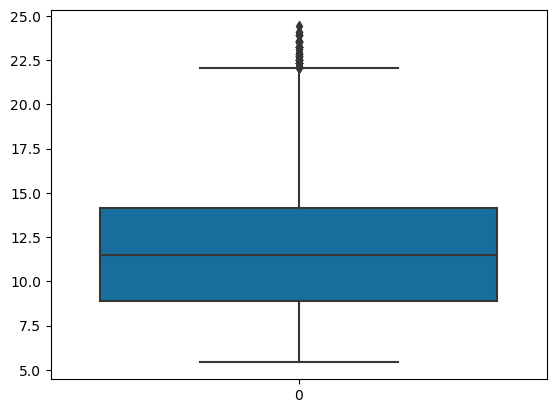

In [169]:
sns.boxplot(data= loan_data.int_rate)


In [170]:
# There is so many outliners in interest rate we see it.

In [171]:
loan_data.grade.value_counts()*100/len(loan_data)


B   30.60
A   27.63
C   20.48
D   12.81
E    5.99
F    1.95
G    0.53
Name: grade, dtype: float64

In [172]:
loan_data.sub_grade.value_counts().sort_values(ascending=False)*100/len(loan_data)


A4   7.82
A5   7.45
B3   7.35
B5   6.74
B4   6.31
C1   5.34
B2   5.31
A3   5.01
C2   4.97
B1   4.89
A2   4.17
C3   3.89
D2   3.31
C4   3.24
A1   3.18
C5   3.03
D3   2.79
D1   2.45
D4   2.23
D5   2.02
E1   1.70
E2   1.41
E3   1.18
E4   0.94
E5   0.77
F1   0.62
F2   0.47
F3   0.35
F4   0.32
F5   0.19
G1   0.16
G2   0.13
G3   0.09
G4   0.09
G5   0.06
Name: sub_grade, dtype: float64

In [173]:
loan_data.term.value_counts()*100/len(loan_data)


 36 months   78.09
 60 months   21.91
Name: term, dtype: float64

In [174]:
loan_data.sub_grade.isnull().sum()*100/len(loan_data)

0.0

In [175]:
loan_data.annual_inc.value_counts()*100/len(loan_data)

60000.00    3.88
50000.00    2.82
40000.00    2.37
30000.00    2.26
45000.00    2.23
            ... 
107806.40   0.00
135600.00   0.00
53844.00    0.00
114500.00   0.00
27376.00    0.00
Name: annual_inc, Length: 4913, dtype: float64

<Axes: >

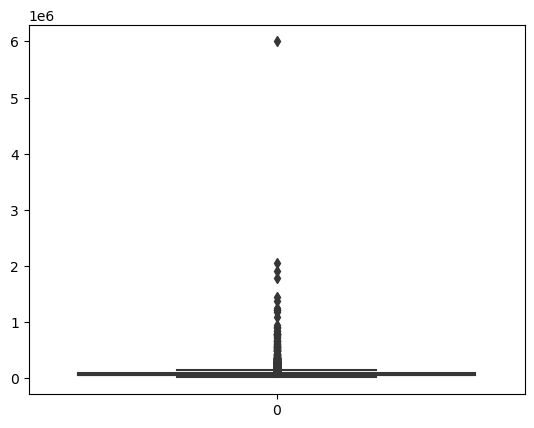

In [176]:
# Set the figure size
sns.boxplot(data = loan_data.annual_inc)

#As we can see there is so many outliners for annual_inc columns 


<Axes: >

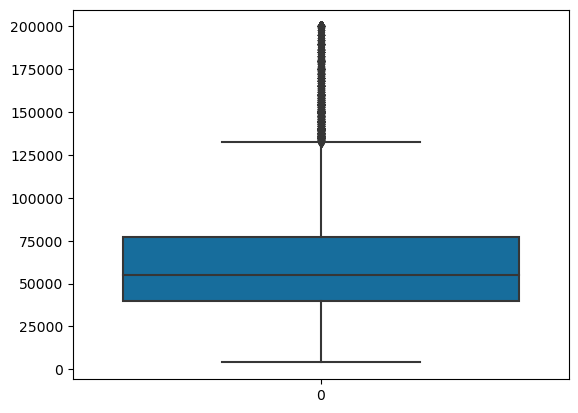

In [177]:
loan_data = loan_data[loan_data.annual_inc < loan_data.annual_inc.quantile(.99)]
sns.boxplot(data = loan_data.annual_inc)

<Axes: >

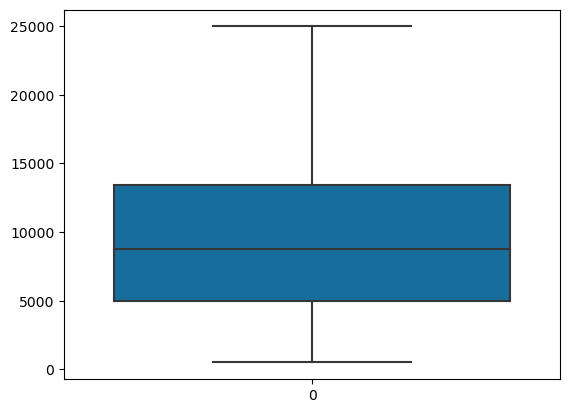

In [178]:
sns.boxplot(data = loan_data.loan_amnt)


count   35453.00
mean     9494.84
std      5468.42
min       500.00
25%      5000.00
50%      8500.00
75%     13000.00
max     24975.00
Name: funded_amnt, dtype: float64

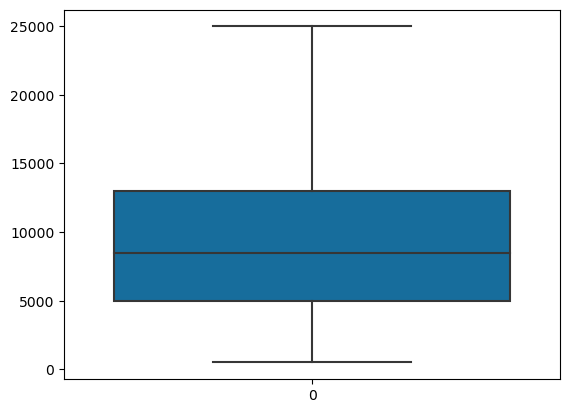

In [179]:
sns.boxplot(data = loan_data.funded_amnt)
loan_data.funded_amnt.describe()


In [180]:
loan_data.emp_length.value_counts()

10+ years    7373
< 1 year     4275
2 years      4037
3 years      3752
4 years      3097
1 year       2990
5 years      2952
6 years      1990
7 years      1576
8 years      1302
9 years      1125
Name: emp_length, dtype: int64

In [181]:
loan_data.emp_length.isnull().sum()

984

In [182]:
loan_data.emp_length.mode()

0    10+ years
Name: emp_length, dtype: object

In [183]:
loan_data.dti.value_counts()

0.00     172
18.00     42
12.00     40
19.20     39
13.20     37
        ... 
29.78      1
28.93      1
25.60      1
29.77      1
25.43      1
Name: dti, Length: 2837, dtype: int64

<Axes: >

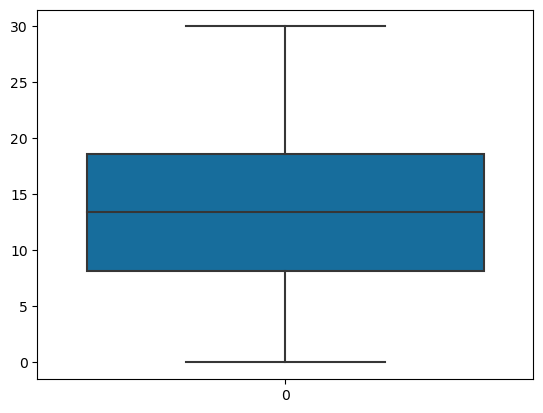

In [184]:
sns.boxplot(data= loan_data.dti)

In [185]:
loan_data.emp_length.isnull().sum()

984

In [186]:
# filling emp exp null value with 0 
loan_data['emp_length'] = loan_data.emp_length.fillna('< 1 year')
loan_data.emp_length.isnull().sum()

0

In [187]:
loan_data.emp_length = loan_data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0]))


In [188]:
loan_data['emp_length'].value_counts()

10    7373
0     5259
2     4037
3     3752
4     3097
1     2990
5     2952
6     1990
7     1576
8     1302
9     1125
Name: emp_length, dtype: int64

In [189]:
loan_data.emp_title.value_counts()*100/len(loan_data)

US Army                     0.32
Bank of America             0.28
AT&T                        0.15
IBM                         0.14
US Air Force                0.14
                            ... 
Whittlesey & Hadley, P.C.   0.00
T-Mobile Usa                0.00
EPL, Inc.                   0.00
Hyde Tools                  0.00
Evergreen Center            0.00
Name: emp_title, Length: 26119, dtype: float64

In [190]:
loan_data['home_ownership'].value_counts()*100/len(loan_data)

RENT       49.57
MORTGAGE   42.25
OWN         7.91
OTHER       0.26
NONE        0.01
Name: home_ownership, dtype: float64

In [191]:
loan_data['earliest_cr_line'].value_counts()

Oct-99    342
Nov-98    326
Oct-00    319
Dec-98    316
Nov-00    301
         ... 
Feb-73      1
Nov-65      1
Jun-68      1
May-65      1
Jan-72      1
Name: earliest_cr_line, Length: 521, dtype: int64

In [192]:
loan_data['issue_d'].value_counts()*100/len(loan_data)

Nov-11   5.21
Dec-11   5.09
Oct-11   4.80
Sep-11   4.74
Aug-11   4.53
Jul-11   4.45
Jun-11   4.36
May-11   4.13
Apr-11   3.97
Mar-11   3.68
Jan-11   3.65
Dec-10   3.37
Feb-11   3.35
Jul-10   2.97
Oct-10   2.96
Nov-10   2.92
Sep-10   2.86
Aug-10   2.84
Jun-10   2.71
May-10   2.39
Apr-10   2.19
Mar-10   1.93
Feb-10   1.64
Nov-09   1.61
Dec-09   1.60
Jan-10   1.55
Oct-09   1.45
Sep-09   1.25
Aug-09   1.13
Jul-09   1.00
Jun-09   0.97
May-09   0.87
Apr-09   0.78
Mar-09   0.77
Feb-09   0.72
Jan-09   0.67
Mar-08   0.61
Dec-08   0.61
Nov-08   0.50
Feb-08   0.47
Jan-08   0.45
Apr-08   0.41
Oct-08   0.26
Jul-08   0.23
Dec-07   0.22
Aug-08   0.20
May-08   0.20
Jun-08   0.19
Oct-07   0.13
Nov-07   0.09
Aug-07   0.09
Sep-08   0.08
Jul-07   0.08
Sep-07   0.05
Jun-07   0.00
Name: issue_d, dtype: float64

In [193]:
loan_data.isnull().sum()

loan_amnt                      0
funded_amnt                    0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2165
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
desc                       11535
purpose                        0
title                         11
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    49
total_acc                      0
collection_recovery_fee        0
pub_rec_bankruptcies         653
dtype: int64

In [194]:
loan_data.home_ownership.value_counts()
loan_data['home_ownership'] = loan_data.home_ownership.apply(lambda x : 'OTHER' if x == 'NONE' else x)
loan_data.home_ownership.value_counts()

RENT        17575
MORTGAGE    14979
OWN          2804
OTHER          95
Name: home_ownership, dtype: int64

# Driving columns from date field

In [195]:
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'] , format='%b-%y')
loan_data['earliest_cr_line_year']=loan_data['earliest_cr_line'].dt.year
loan_data['earliest_cr_line_month']=loan_data['earliest_cr_line'].dt.month

loan_data.head(1)

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collection_recovery_fee,pub_rec_bankruptcies,earliest_cr_line_year,earliest_cr_line_month
0,5000,5000,36 months,10.65,162.87,B,B2,NaN,10,RENT,24000.00,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70,9,0.00,0.00,1985,1


In [196]:
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'] , format='%b-%y')
loan_data['issue_d_year']=loan_data['issue_d'].dt.year
loan_data['issue_d_month']=loan_data['issue_d'].dt.month

loan_data.head(1)

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collection_recovery_fee,pub_rec_bankruptcies,earliest_cr_line_year,earliest_cr_line_month,issue_d_year,issue_d_month
0,5000,5000,36 months,10.65,162.87,B,B2,NaN,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70,9,0.00,0.00,1985,1,2011,12


In [197]:
loan_data['inq_last_6mths'].value_counts()*100/len(loan_data)

0   48.66
1   27.69
2   14.63
3    7.68
4    0.74
5    0.34
6    0.15
7    0.08
8    0.03
Name: inq_last_6mths, dtype: float64

In [198]:
loan_data['loan_status_num'] = loan_data.loan_status.apply(lambda x : 1 if x == 'Charged Off' else 0)
loan_data.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collection_recovery_fee,pub_rec_bankruptcies,earliest_cr_line_year,earliest_cr_line_month,issue_d_year,issue_d_month,loan_status_num
0,5000,5000,36 months,10.65,162.87,B,B2,NaN,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70,9,0.00,0.00,1985,1,2011,12,0
1,2500,2500,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.00,Source Verified,2011-12-01,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,bike,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,1.11,0.00,1999,4,2011,12,1
2,2400,2400,36 months,15.96,84.33,C,C5,NaN,10,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,NaN,small_business,real estate business,IL,8.72,0,2001-11-01,2,2,0,2956,98.50,10,0.00,0.00,2001,11,2011,12,0
3,10000,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,personel,CA,20.00,0,1996-02-01,1,10,0,5598,21.00,37,0.00,0.00,1996,2,2011,12,0
5,5000,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,NaN,wedding,My wedding loan I promise to pay back,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30,12,0.00,0.00,2004,11,2011,12,0


# Correlation Matrix - Quantitative Variables :

/var/folders/8q/w5bfxzxn30j9vqr9hbth5_dx2zhndv/T/ipykernel_45316/3049921254.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan_Corr_data = loan_data.corr()


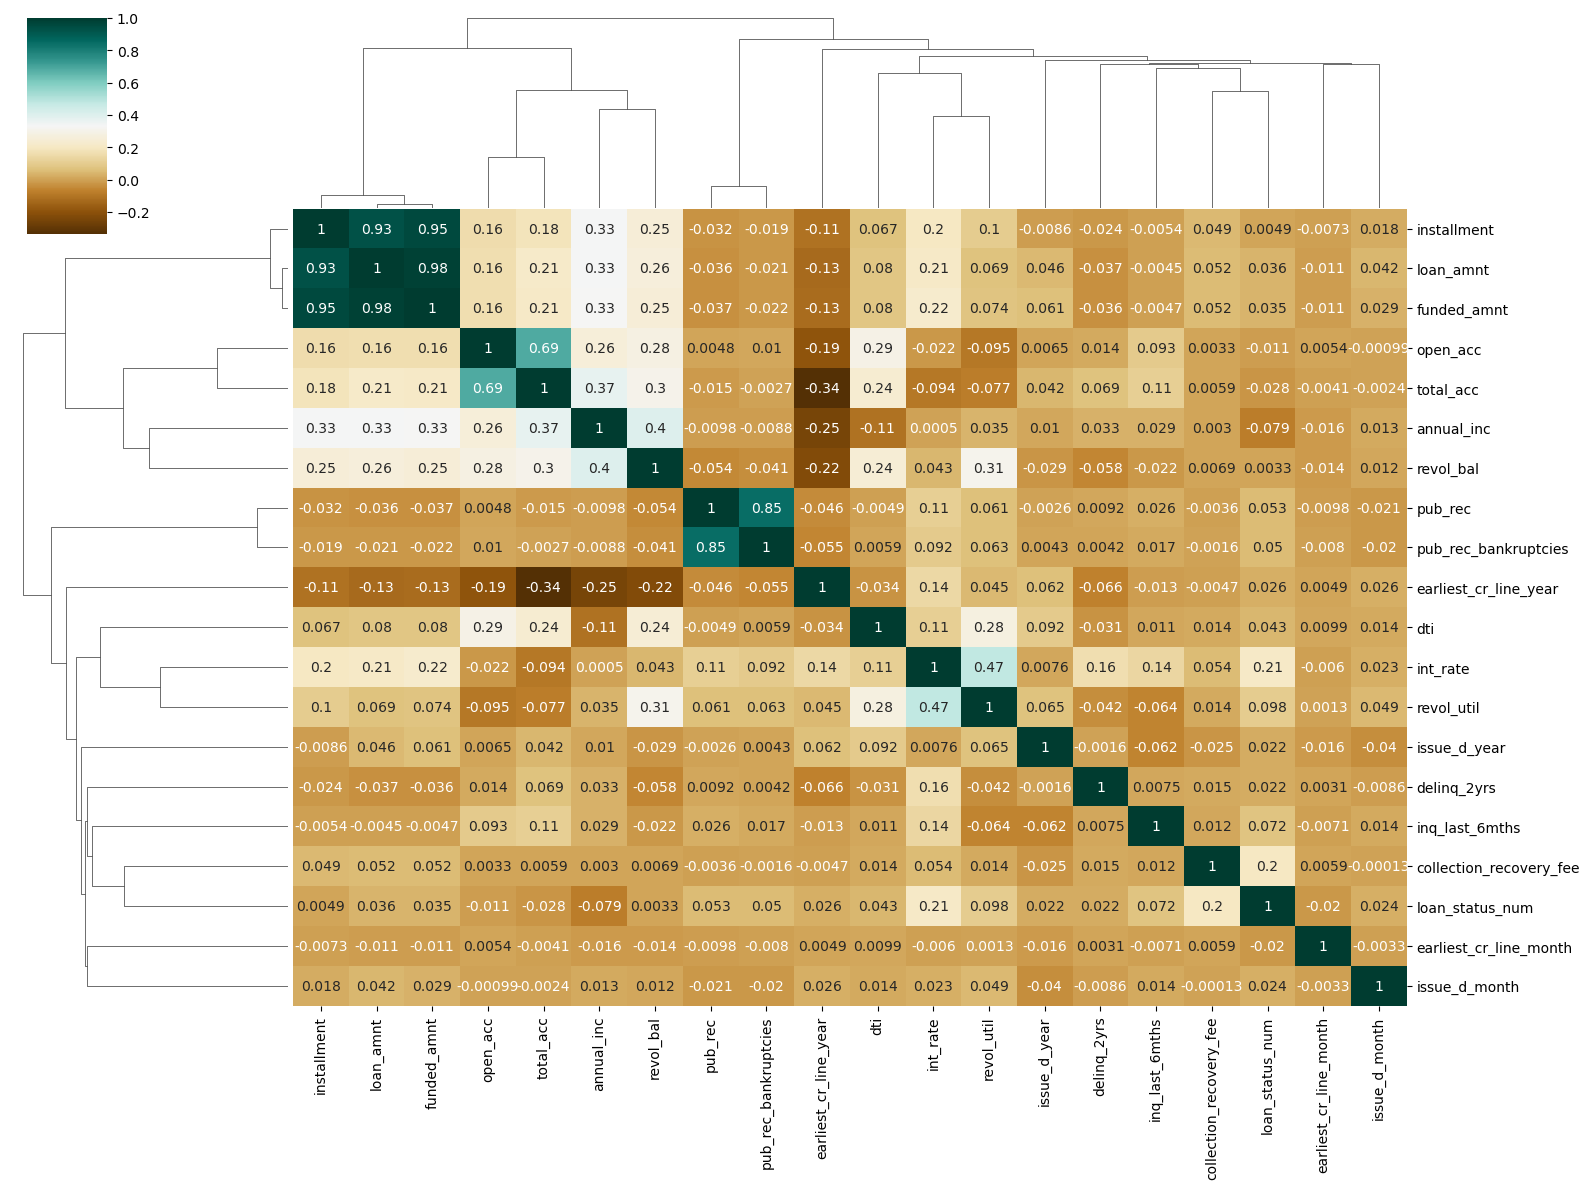

In [199]:
loan_Corr_data = loan_data.corr()
sns.clustermap(loan_Corr_data,annot=True,figsize=(16, 12),cmap="BrBG")

#as we can see funded_amt, loan amnt, installment and funded_amnt_inv is positivily coreelated
#and annual-inc negative correlated to dti
#int_rate and revol_util is little bit positivly related


<Axes: xlabel='loan_status', ylabel='loan_amnt'>

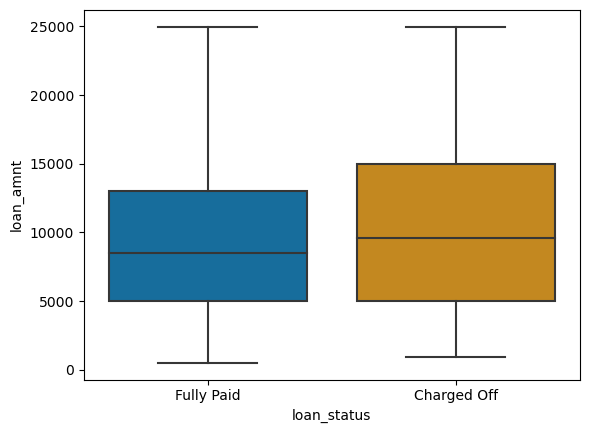

In [200]:
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_data)

# for both loan status we have outliers 
#and 25 and 75 percentile of full paid is little bit low as compare to charged off

In [202]:
loan_data.loan_amnt.describe()

# we have huge difference in mean and mode of loan amnt analysis it

count   35453.00
mean     9667.07
std      5610.93
min       500.00
25%      5000.00
50%      8800.00
75%     13400.00
max     24975.00
Name: loan_amnt, dtype: float64

In [203]:
loan_data_below_75 = loan_data[(loan_data.loan_amnt<= loan_data.loan_amnt.quantile(.75))]
loan_data_below_75.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collection_recovery_fee,pub_rec_bankruptcies,earliest_cr_line_year,earliest_cr_line_month,issue_d_year,issue_d_month,loan_status_num
0,5000,5000,36 months,10.65,162.87,B,B2,NaN,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70,9,0.00,0.00,1985,1,2011,12,0
1,2500,2500,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.00,Source Verified,2011-12-01,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,bike,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,1.11,0.00,1999,4,2011,12,1
2,2400,2400,36 months,15.96,84.33,C,C5,NaN,10,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,NaN,small_business,real estate business,IL,8.72,0,2001-11-01,2,2,0,2956,98.50,10,0.00,0.00,2001,11,2011,12,0
3,10000,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,personel,CA,20.00,0,1996-02-01,1,10,0,5598,21.00,37,0.00,0.00,1996,2,2011,12,0
5,5000,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,NaN,wedding,My wedding loan I promise to pay back,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30,12,0.00,0.00,2004,11,2011,12,0


count   26595.00
mean     7005.95
std      3242.46
min       500.00
25%      4500.00
50%      7000.00
75%     10000.00
max     13400.00
Name: loan_amnt, dtype: float64

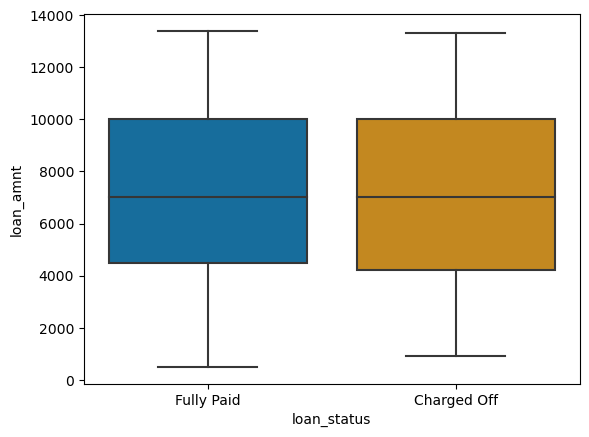

In [204]:
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_data_below_75)
loan_data_below_75.loan_amnt.describe()

count    8858.00
mean    17656.73
std      3056.44
min     13425.00
25%     15000.00
50%     17000.00
75%     20000.00
max     24975.00
Name: loan_amnt, dtype: float64

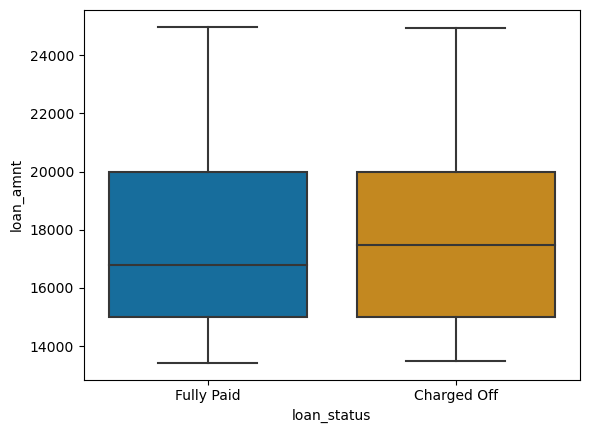

In [205]:
loan_data_above_75 = loan_data[(loan_data.loan_amnt > loan_data.loan_amnt.quantile(.75))]
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_data_above_75)
loan_data_above_75.loan_amnt.describe()

In [206]:
loan_data.sub_grade = pd.to_numeric(loan_data.sub_grade.apply(lambda x : x[1:]))
loan_data.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

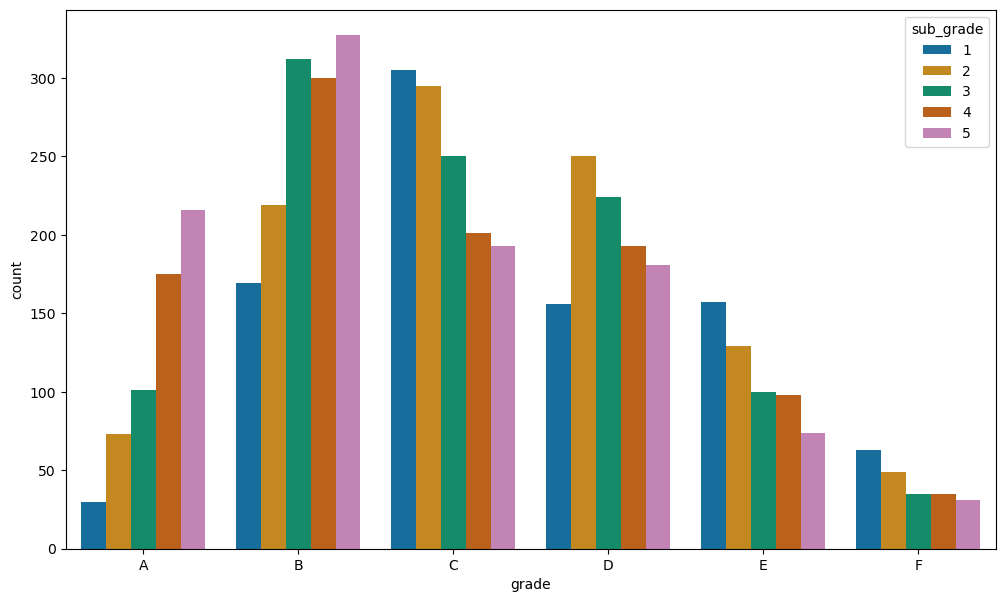

In [207]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order= ['A', 'B', 'C', 'D', "E", 'F'], hue = "sub_grade",
              data = loan_data[loan_data.loan_status == 'Charged Off'] )


<Axes: xlabel='grade', ylabel='count'>

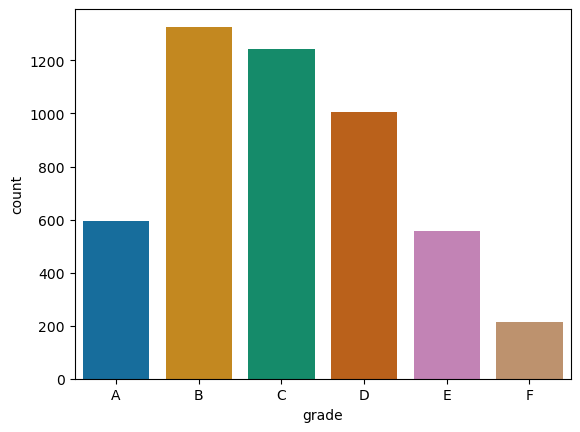

In [208]:
sns.countplot(x = 'grade',order= ['A', 'B', 'C', 'D', "E", 'F'],
              data = loan_data[loan_data.loan_status == 'Charged Off'])

# Loan charge of ratio for grade B, C has high and grade D has medium.

<Axes: xlabel='count', ylabel='purpose'>

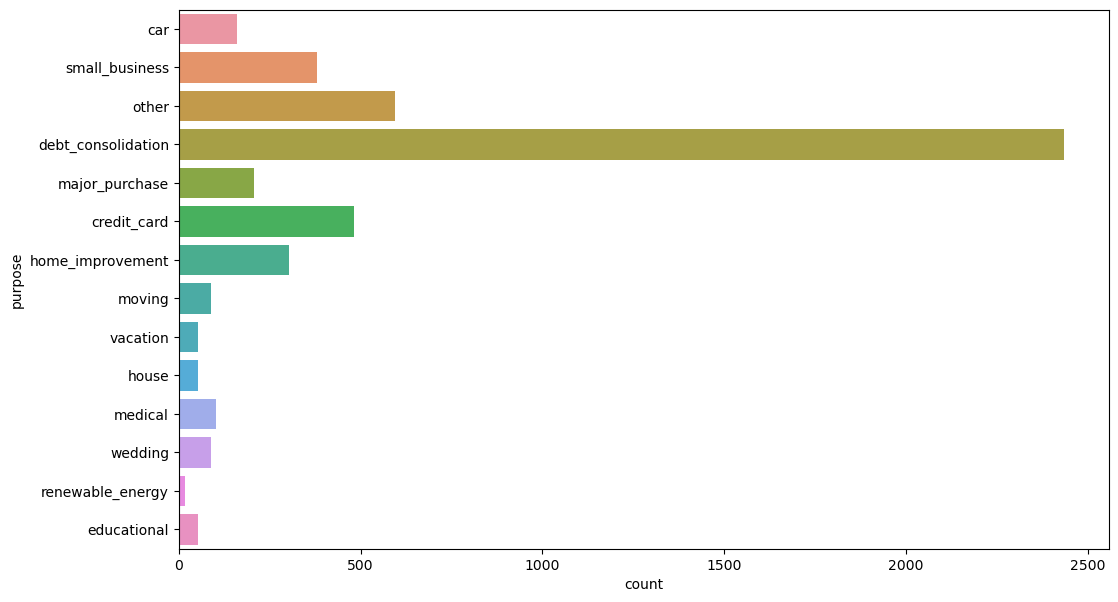

In [209]:
fig, ax = plt.subplots(figsize=(12,7))
#ax.set(xscale = 'log')
sns.set_palette('colorblind')
sns.countplot(y = 'purpose', data = loan_data[loan_data.loan_status == 'Charged Off'])

# debtt consolidation have high charge off and other, cerdit card, small and home improvement have medium impact

<Axes: xlabel='count', ylabel='home_ownership'>

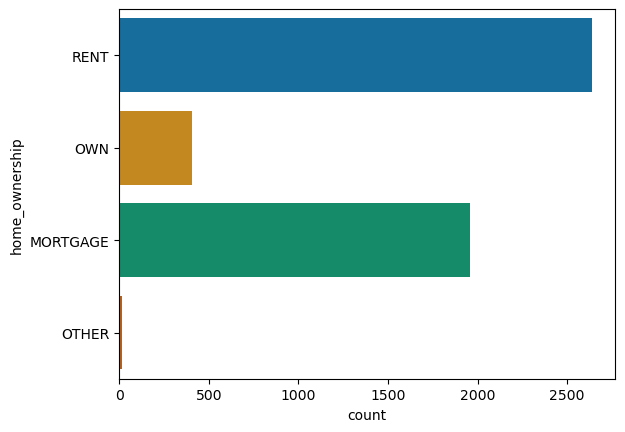

In [210]:
sns.countplot(y = 'home_ownership', data = loan_data[loan_data.loan_status == 'Charged Off'])
# rented and mortgage home owner have high rate of charge off

In [211]:
# Derived columns

loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_data['open_acc_groups'] = pd.cut(loan_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_data['revol_util_groups'] = pd.cut(loan_data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_data['total_acc_groups'] = pd.cut(loan_data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])


# categorise dti into buckets for bivariate analysis.
loan_data['dti_groups'] = pd.cut(loan_data['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

In [212]:
loan_data.dti_groups.value_counts()

10-15    8867
15-20    8074
05-10    7201
25+      6124
0-5      4453
Name: dti_groups, dtype: int64

/var/folders/8q/w5bfxzxn30j9vqr9hbth5_dx2zhndv/T/ipykernel_45316/3144617144.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


<Axes: xlabel='emp_length', ylabel='count'>

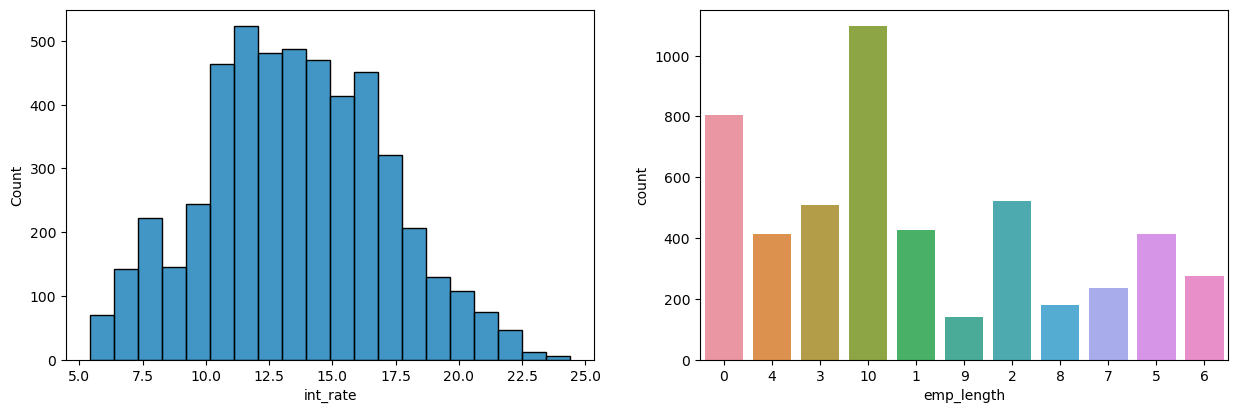

In [213]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)

sns.histplot(x = 'int_rate', data = loan_data[loan_data.loan_status == 'Charged Off'], bins = 20)
plt.subplot(222)
sns.countplot(x='emp_length', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='int_rate_groups', ylabel='count'>

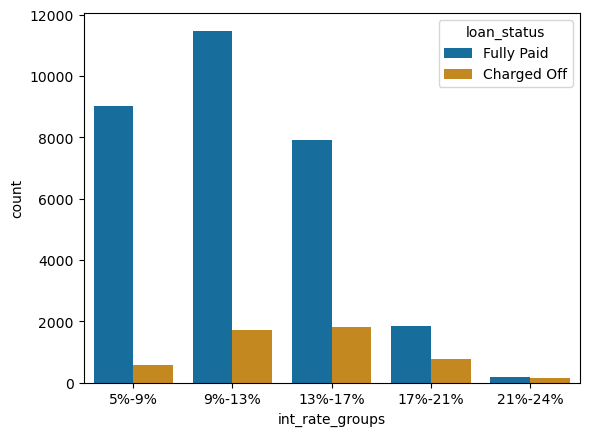

In [214]:
sns.countplot(x='int_rate_groups', data=loan_data, hue = 'loan_status')

<Axes: xlabel='annual_inc', ylabel='Count'>

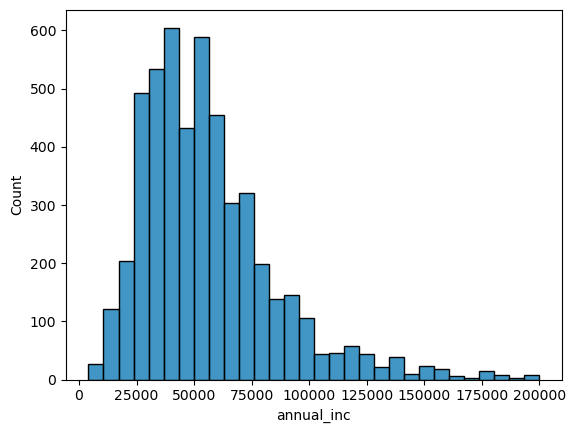

In [215]:
sns.histplot(x = 'annual_inc', data = loan_data[loan_data.loan_status == 'Charged Off'], bins = 30)

<Axes: xlabel='open_acc_groups', ylabel='count'>

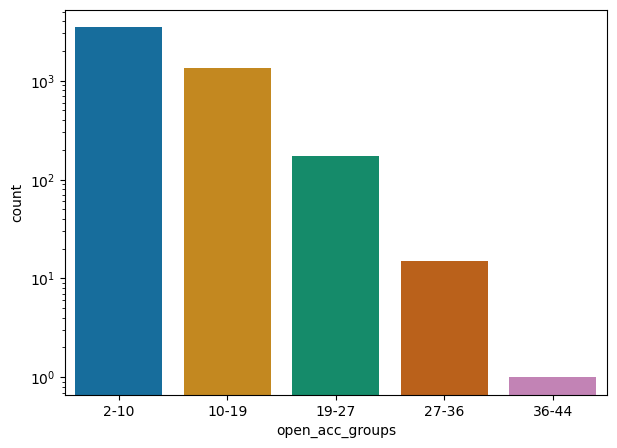

In [216]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])


/var/folders/8q/w5bfxzxn30j9vqr9hbth5_dx2zhndv/T/ipykernel_45316/586461362.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


<Axes: xlabel='revol_util_groups', ylabel='count'>

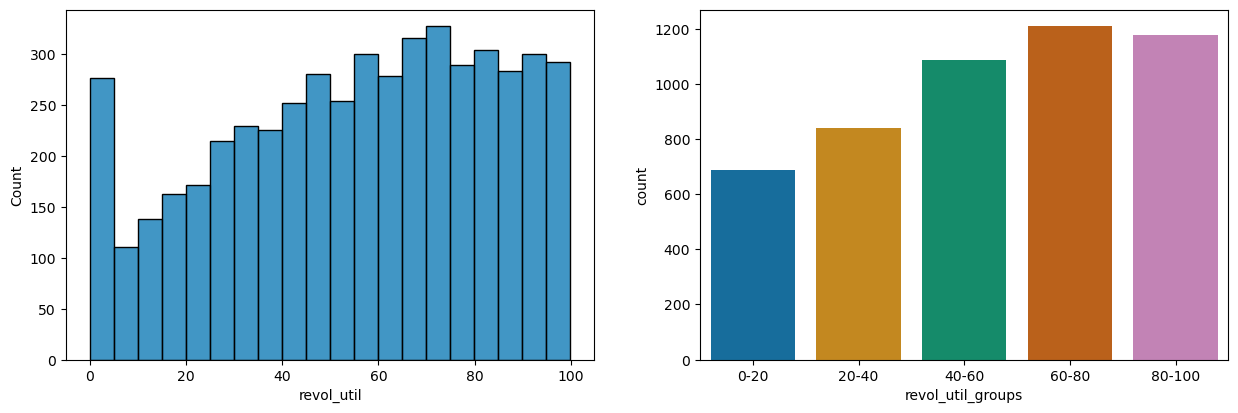

In [217]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.histplot(x='revol_util', data=loan_data[loan_data.loan_status == 'Charged Off'], bins = 20)
plt.subplot(222)
sns.countplot(x='revol_util_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='total_acc_groups', ylabel='count'>

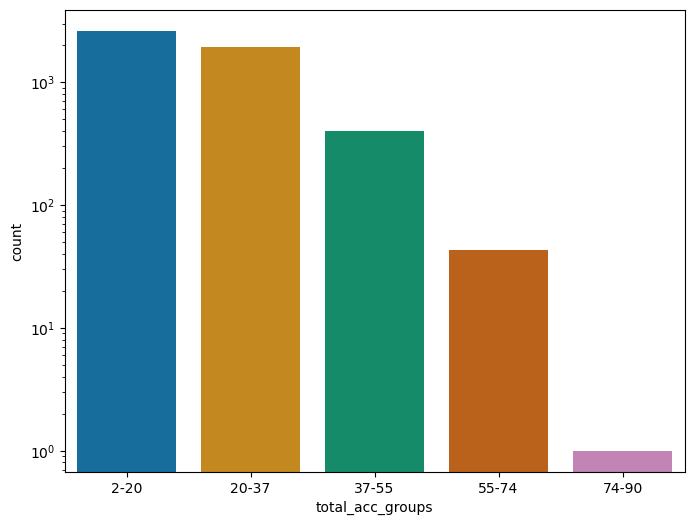

In [218]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])


<Axes: xlabel='annual_inc_groups', ylabel='count'>

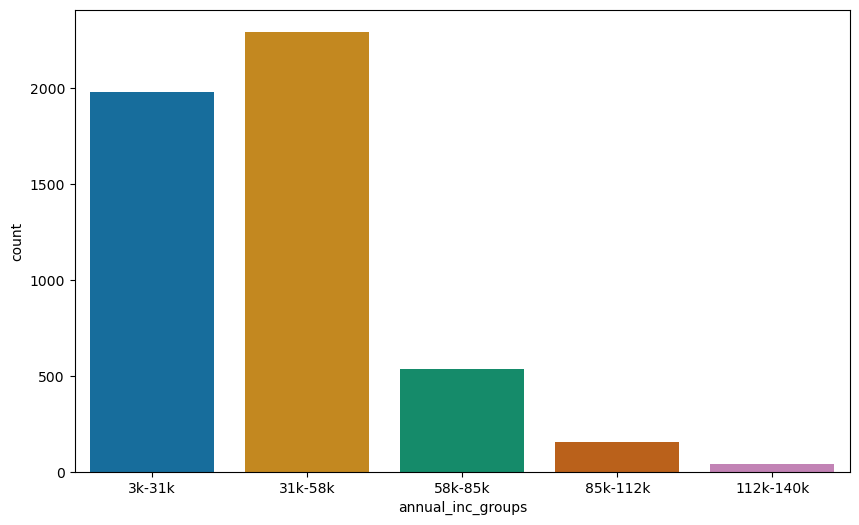

In [219]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])


<Axes: xlabel='count', ylabel='term'>

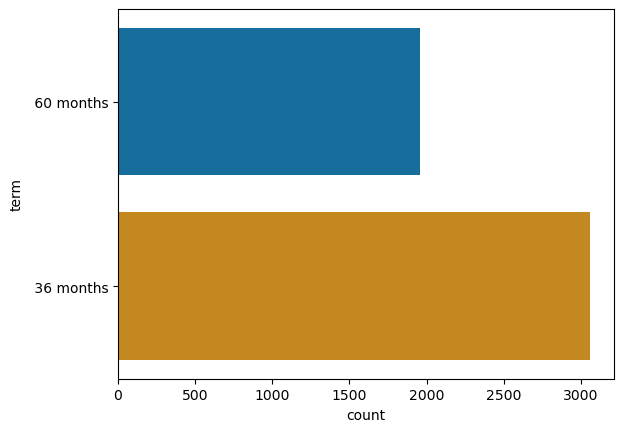

In [224]:
sns.countplot(y='term', data=loan_data[loan_data['loan_status']=='Charged Off'])


In [243]:
len(loan_data[(loan_data['loan_status']=='Charged Off') ])

5015

In [248]:
loan_term = loan_data[(loan_data['loan_status']=='Charged Off') ]
loan_term.term.value_counts()

 36 months    3060
 60 months    1955
Name: term, dtype: int64

In [240]:
len(loan_data[(loan_data['loan_status']=='Fully Paid')])

30438

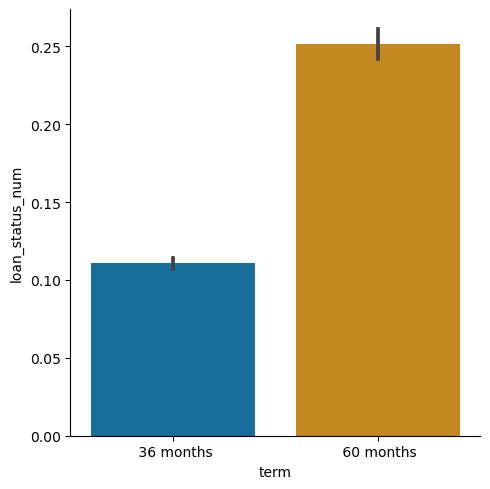

In [234]:
sns.catplot(x = 'term', y = 'loan_status_num', data = loan_data, kind = 'bar')

In [221]:
loan_data[(loan_data['loan_status']=='Charged Off') & loan_data['term'] == '36 months']

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collection_recovery_fee,pub_rec_bankruptcies,earliest_cr_line_year,earliest_cr_line_month,issue_d_year,issue_d_month,loan_status_num,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,loan_amnt_groups,dti_groups


<Axes: xlabel='verification_status', ylabel='count'>

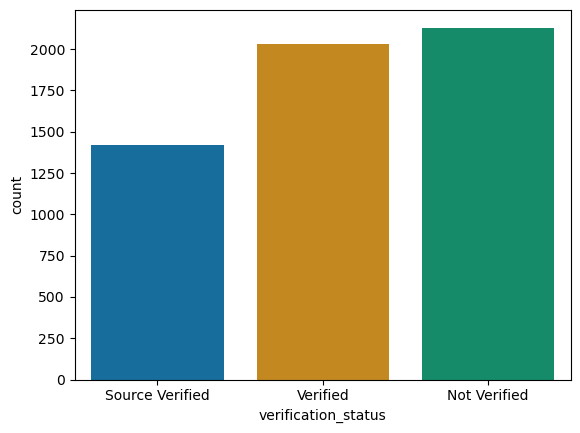

In [170]:
sns.countplot(x='verification_status', data=loan_data[loan_data['loan_status']=='Charged Off'])


<Axes: xlabel='inq_last_6mths', ylabel='count'>

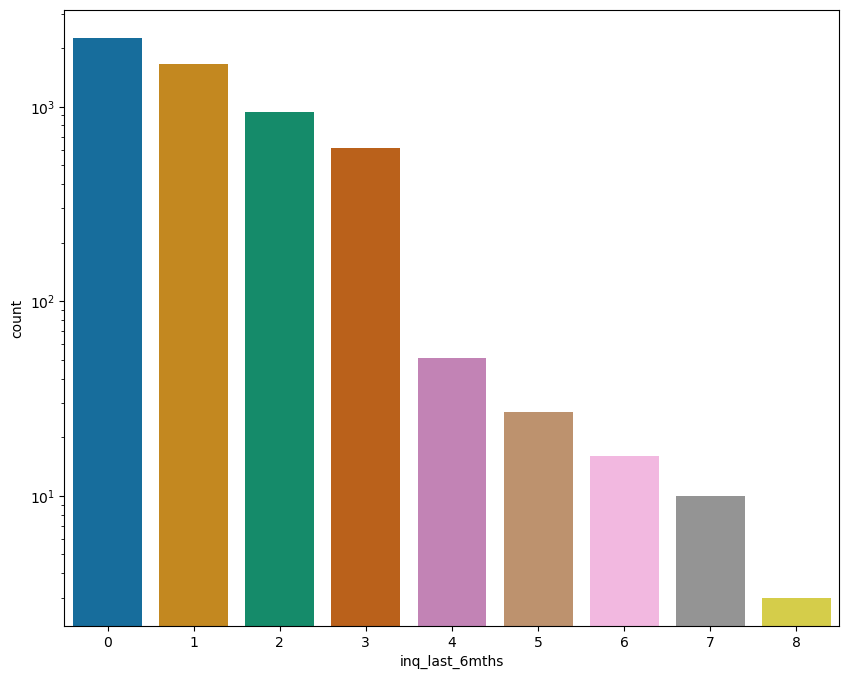

In [171]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=loan_data[loan_data['loan_status']=='Charged Off'])


<Axes: xlabel='pub_rec', ylabel='count'>

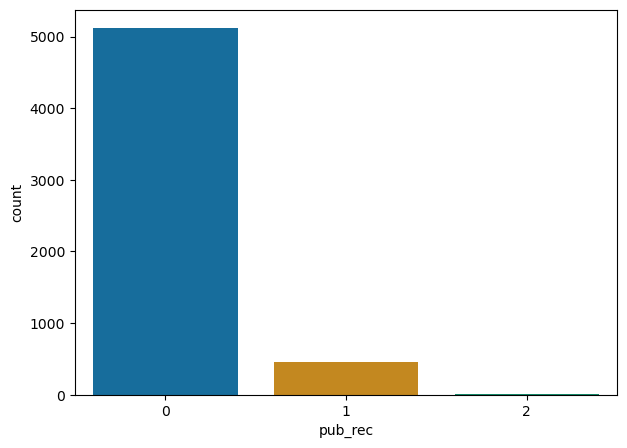

In [172]:
fig,ax = plt.subplots(figsize = (7,5))
#ax.set_yscale('log')
sns.countplot(x='pub_rec', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='issue_d_year', ylabel='count'>

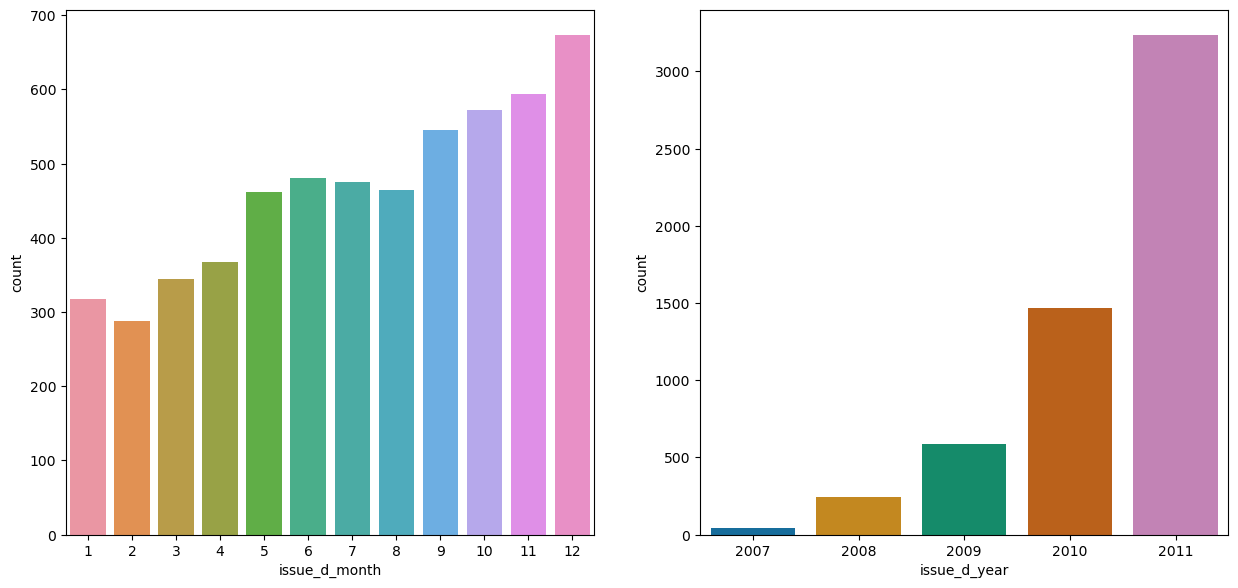

In [173]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_d_month', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_d_year', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='issue_d_month', ylabel='count'>

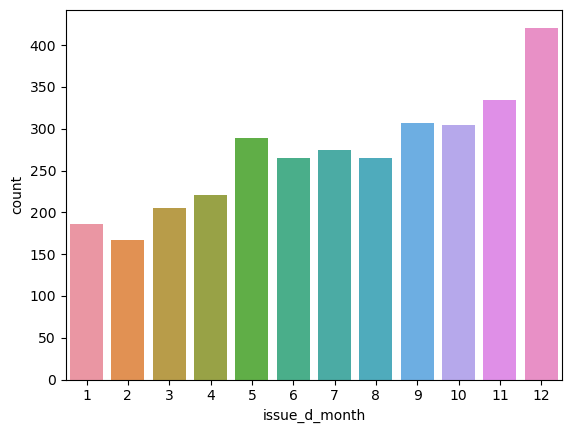

In [174]:
loan_data_2011 = loan_data[(loan_data['issue_d_year'] == 2011)]

sns.countplot(x='issue_d_month', data=loan_data_2011[loan_data_2011['loan_status']=='Charged Off'])

In [175]:
# for 2011 year we have so many charged off as there is financial crisis 

Observations for being defaulter:
 - Rented has high rate of and mortgage has medium rate of charge off
 - Grade B has high rate of defaulter and C have medium rate
 - Not Verified source high rate to be defaulter
 - Term 36 have high rate as EMI is high
 - Debtt consolidation have high charge off and other, cerdit card, small and home improvement have medium impact
 - When the no of enquiries in last 6 months is 0
 - annual income between 30k to 60k
 - When monthly installments are between 145-274
 - Applicants with employement length of 10
 - Applicants who have 20-37 open_acc
 - Applicants who have revol util 60 to 80 have high and for 0 to 5 we have medium possibility
 - for 2011 year we have so many charged off as there is financial crisis
 


Analysing annual income with other columns for more insights


1.Annual income vs loan purpose

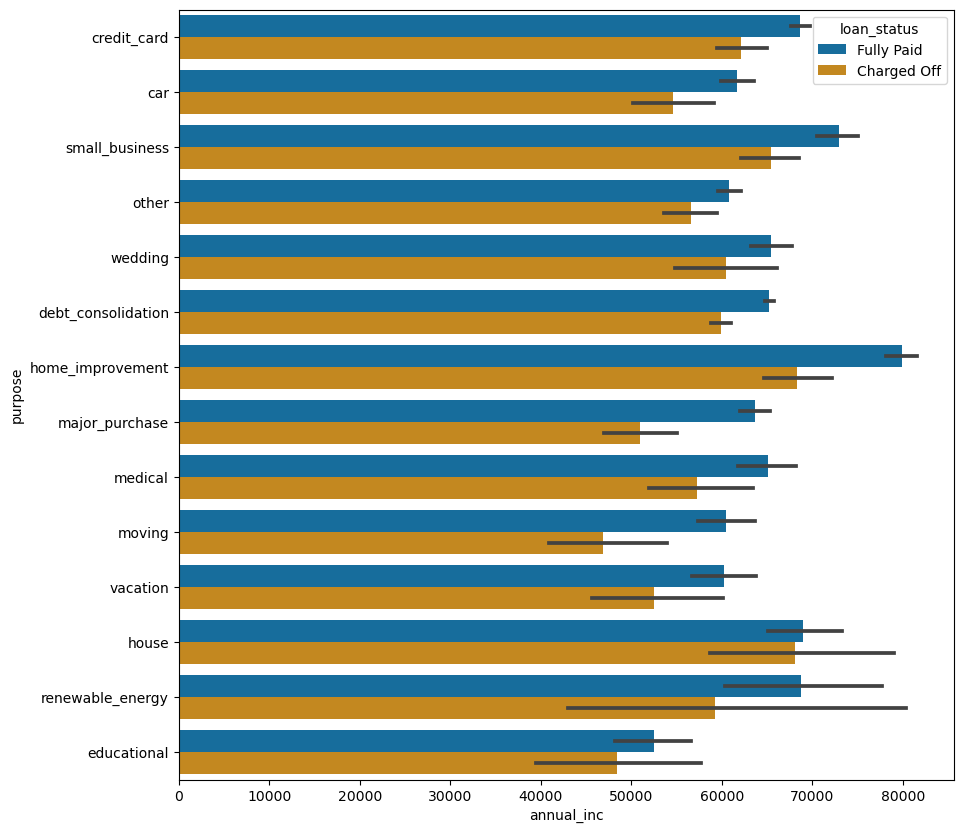

In [176]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='annual_inc', y='purpose', hue ='loan_status')
plt.show()

#loan have beem taken for credit card,small business, house and home improvement and for debt consolidation have high rate of defaulter

2. Annual income VS home owener ship

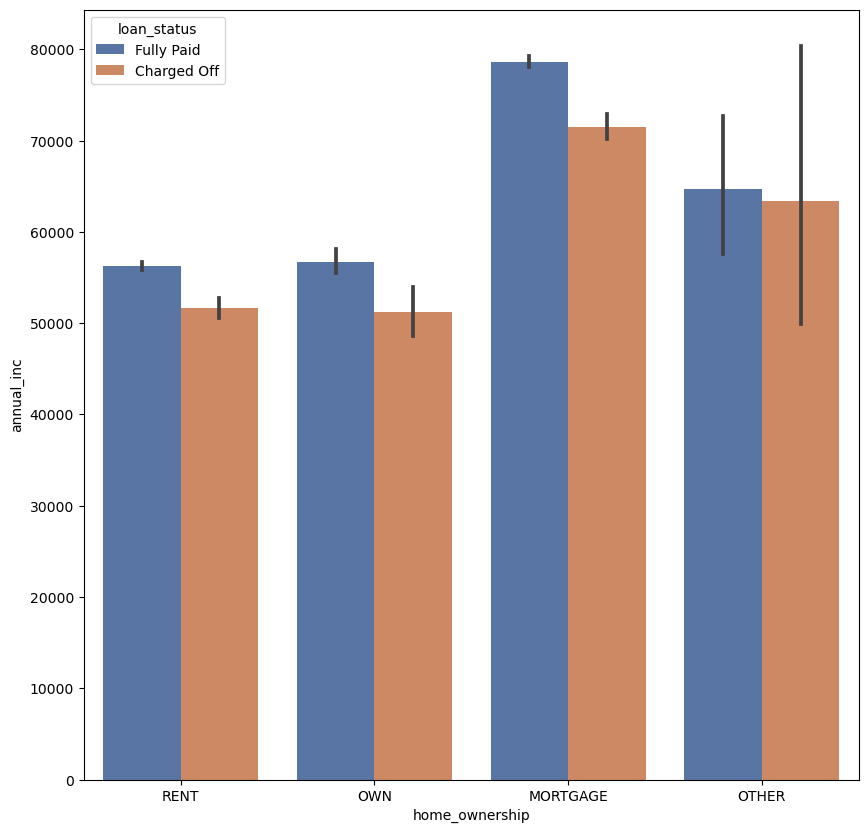

In [177]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='home_ownership', y='annual_inc', hue ='loan_status',palette="deep")
plt.show()

3. Annual income VS Loan amount

<Axes: xlabel='annual_inc_groups', ylabel='loan_amnt'>

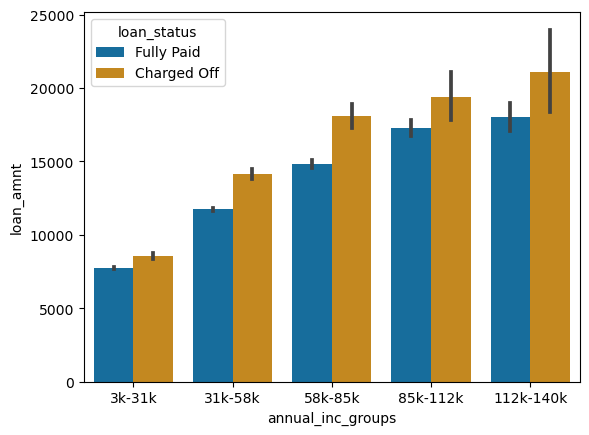

In [178]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = loan_data)

<Axes: xlabel='annual_inc_groups', ylabel='loan_amnt'>

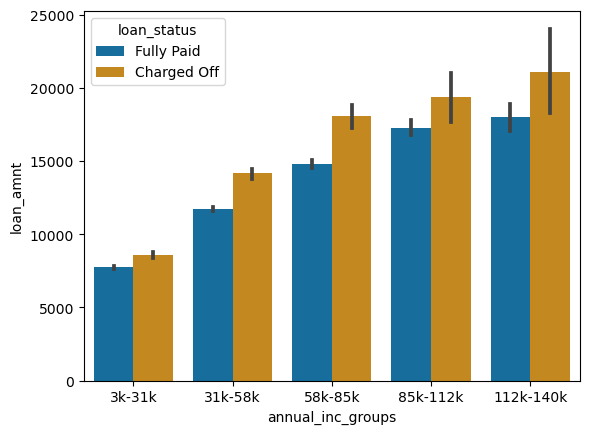

In [179]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = loan_data)

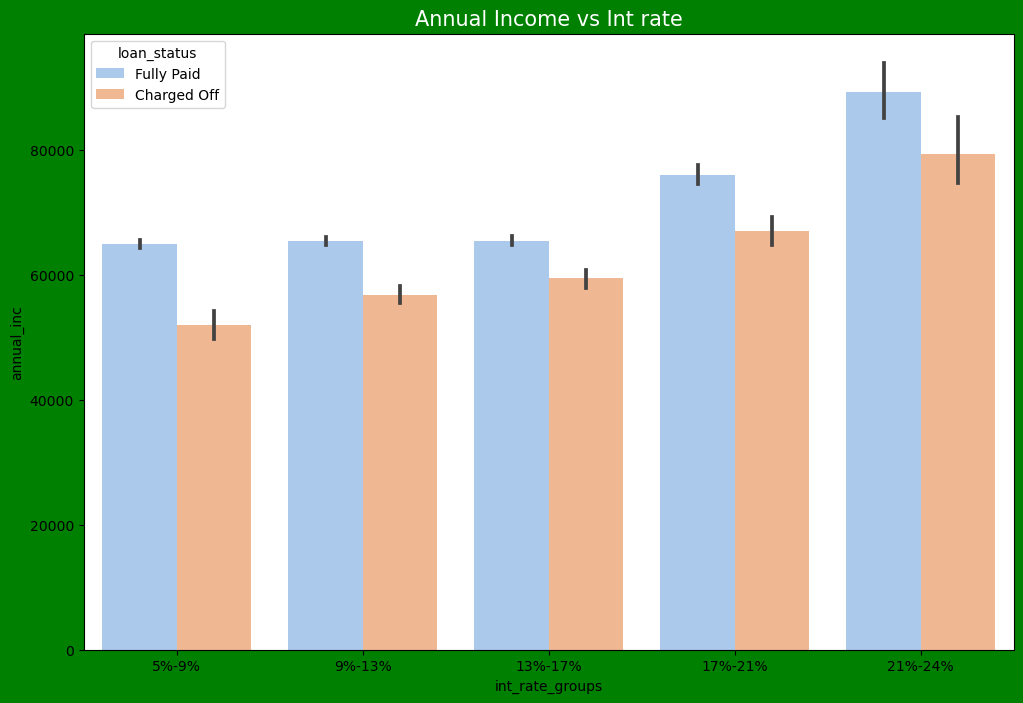

In [180]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('Annual Income vs Int rate',fontsize=15,color = 'w')
sns.barplot(data =loan_data,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

In [181]:
# with high annual income we have high rate of interest and with high interest chances of charge off 

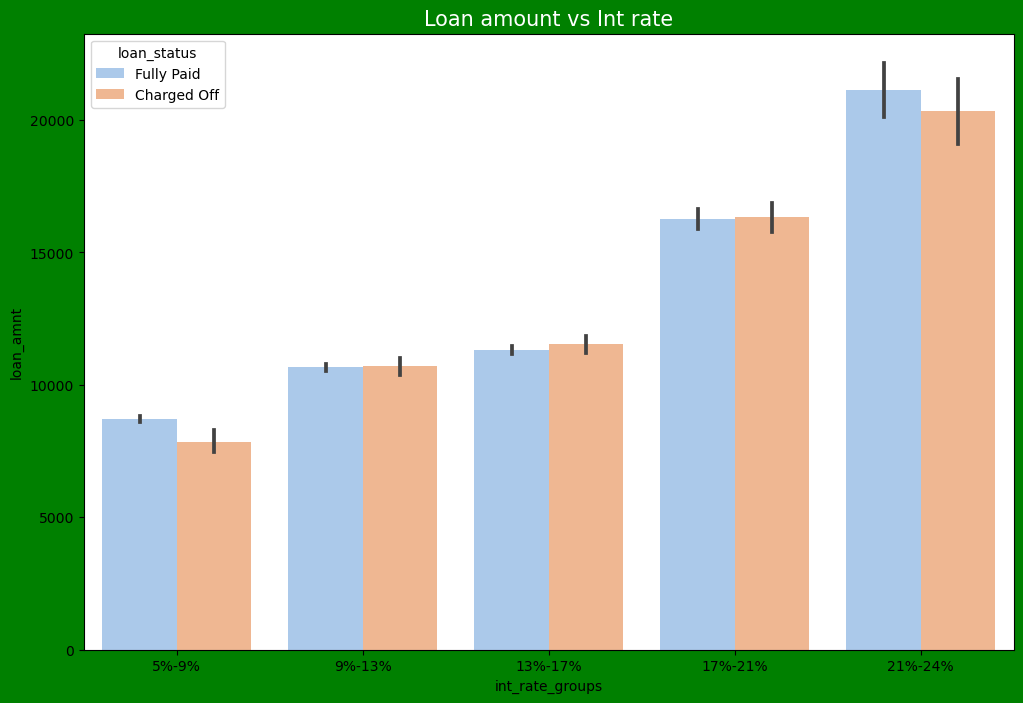

In [182]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('Loan amount vs Int rate',fontsize=15,color = 'w')
sns.barplot(data =loan_data,x='int_rate_groups', y='loan_amnt', hue ='loan_status',palette="pastel")
plt.show()

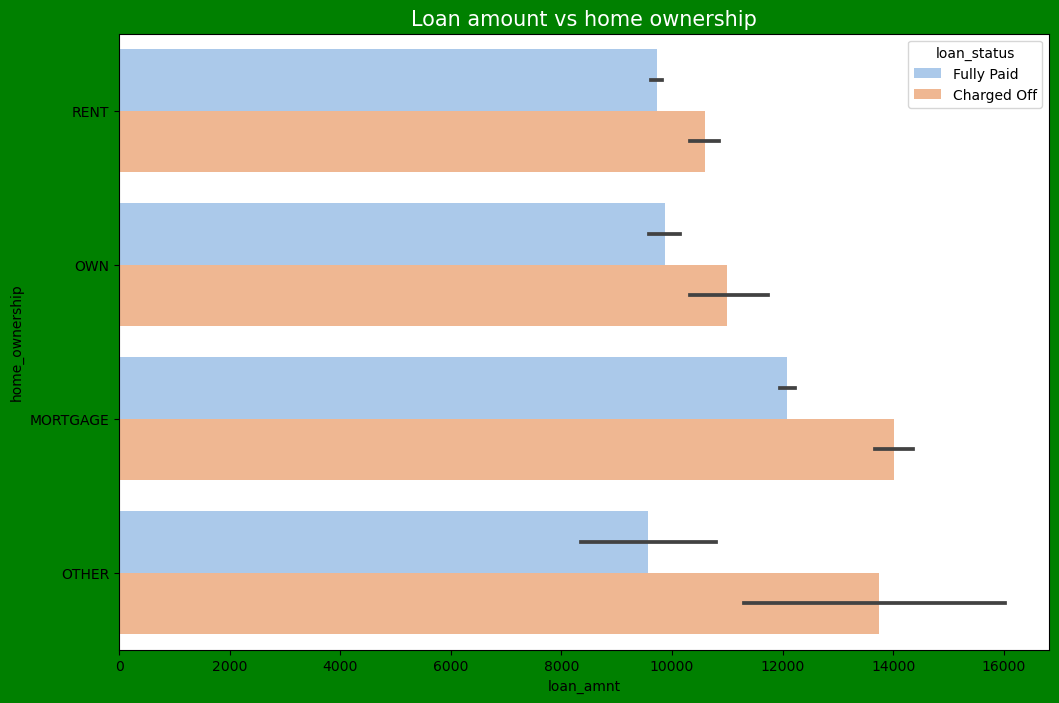

In [183]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('Loan amount vs home ownership',fontsize=15,color = 'w')
sns.barplot(data =loan_data,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

<Axes: xlabel='issue_d_year', ylabel='loan_amnt'>

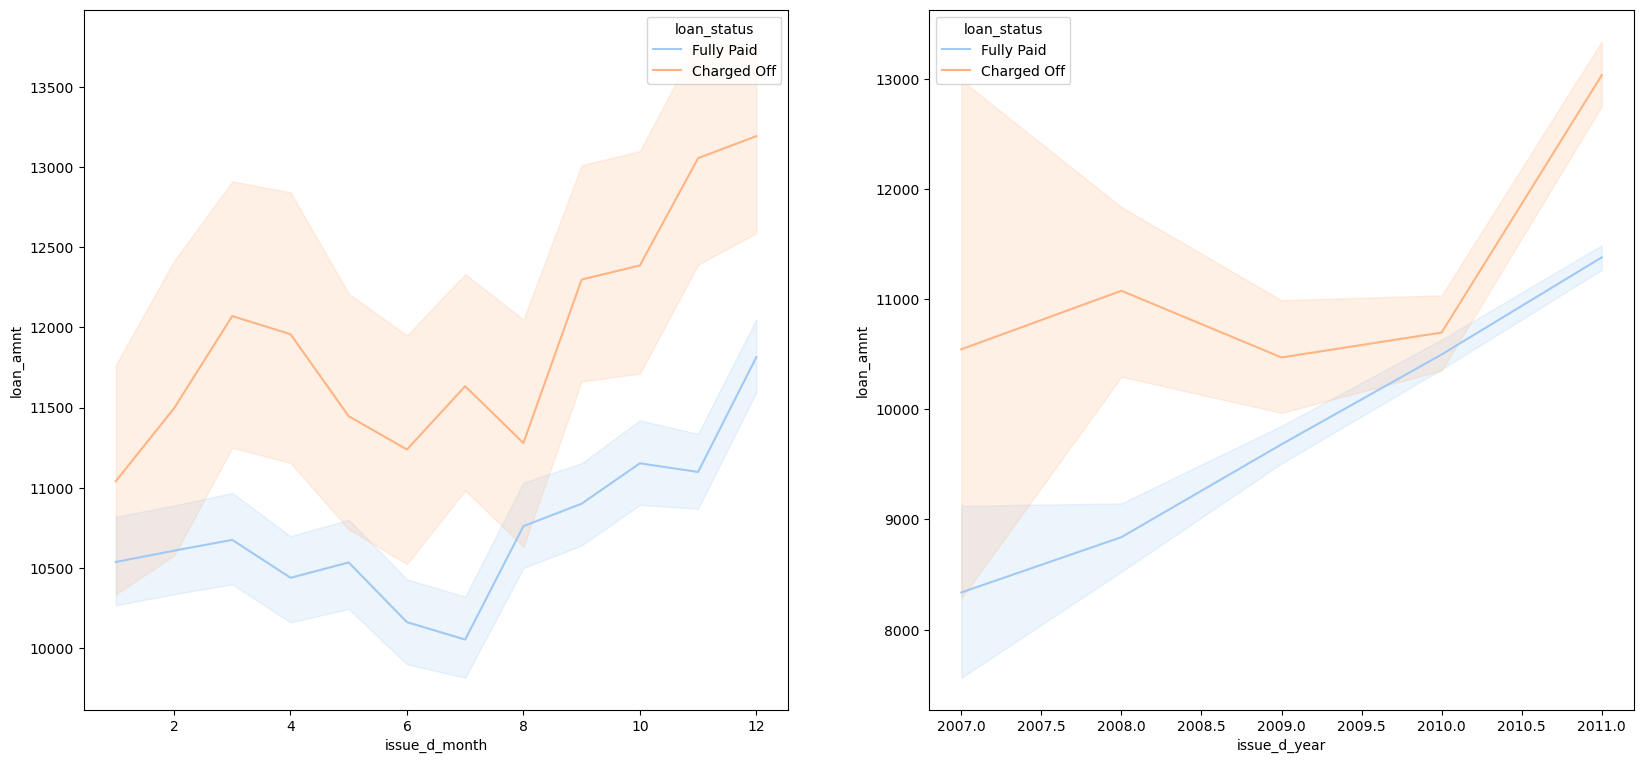

In [184]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =loan_data,y='loan_amnt', x='issue_d_month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data =loan_data,y='loan_amnt', x='issue_d_year', hue ='loan_status',palette="pastel")

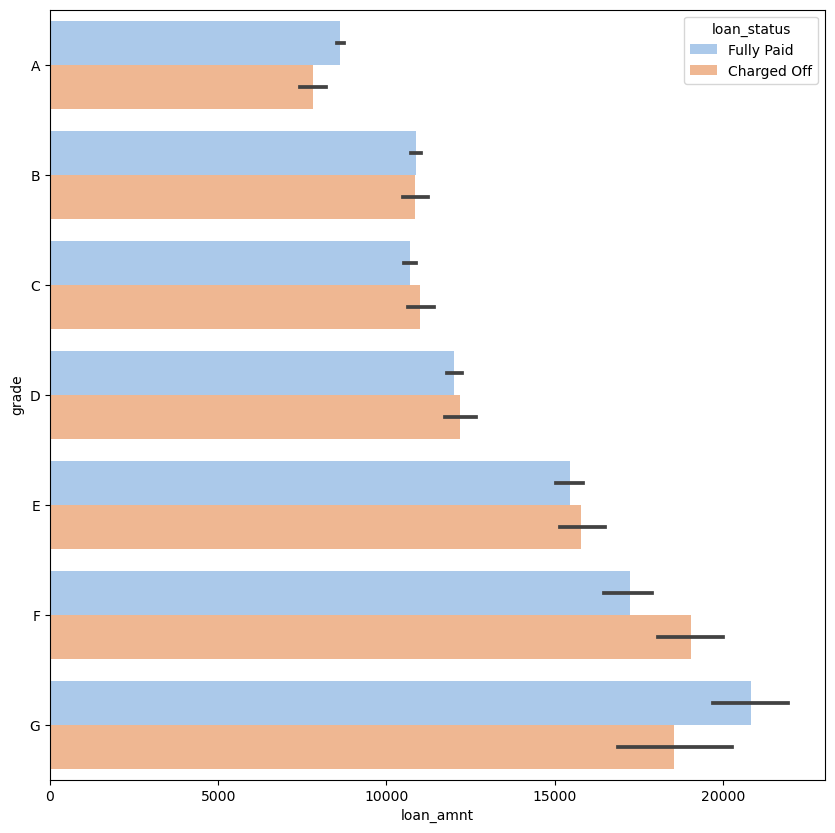

In [185]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

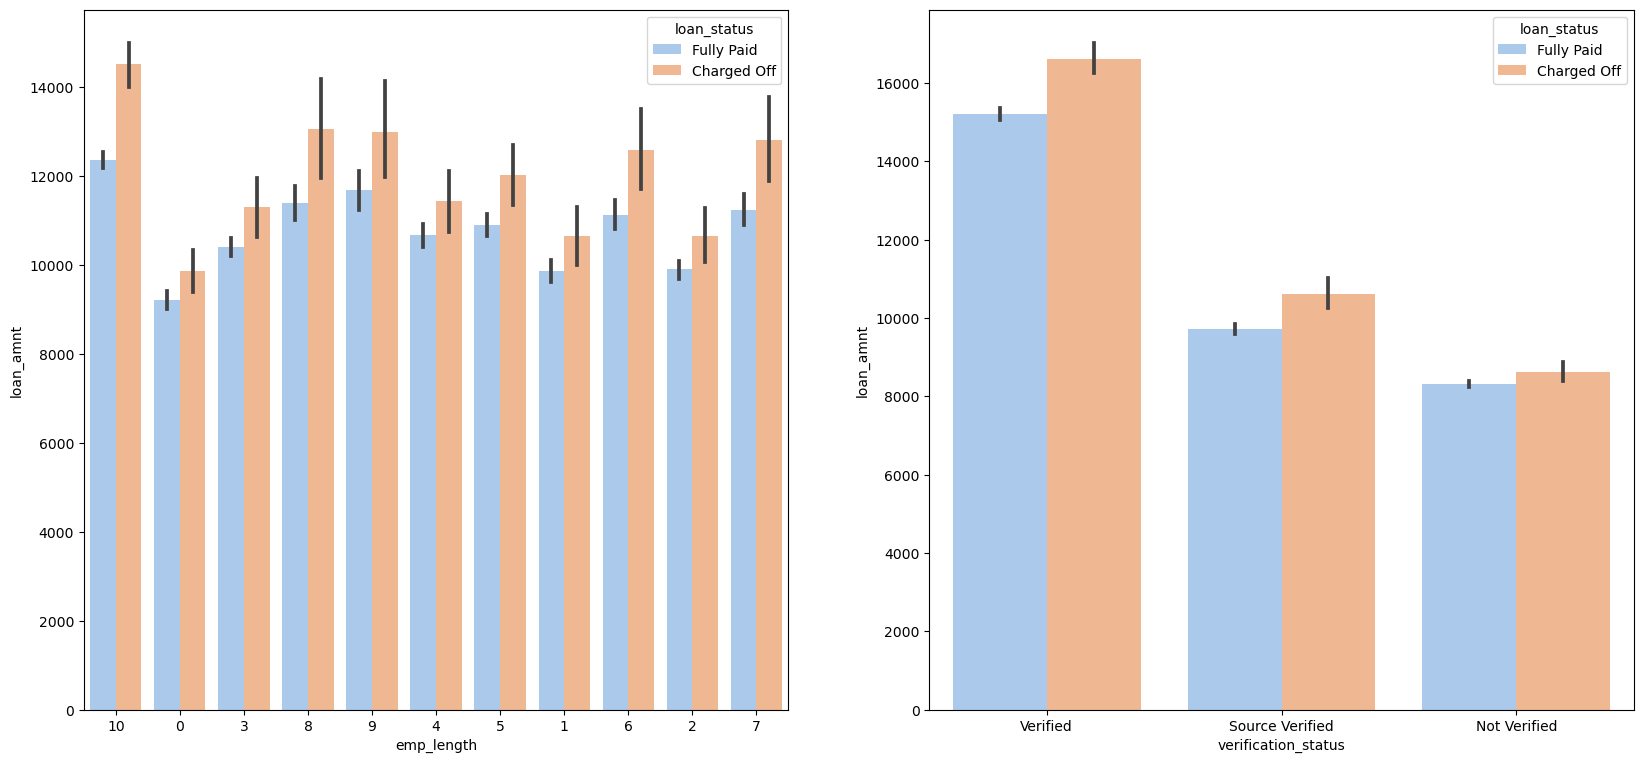

In [186]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan_data,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =loan_data,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")

Employees with longer working history got the loan approved for a higher amount.
- Looking at the verification status data, verified loan applications tend to have higher loan amount. Which might indicate that the firms are first verifying the loans with higher values.

In [187]:
# loan amount positively corelated with interest rate with high loan amount we have high int rate


Observations:

- annual income positively corelated to loan amount i.e .42 and also medium corelated with interest rate. so basically if we have high interest chances of defaulter is high
- 



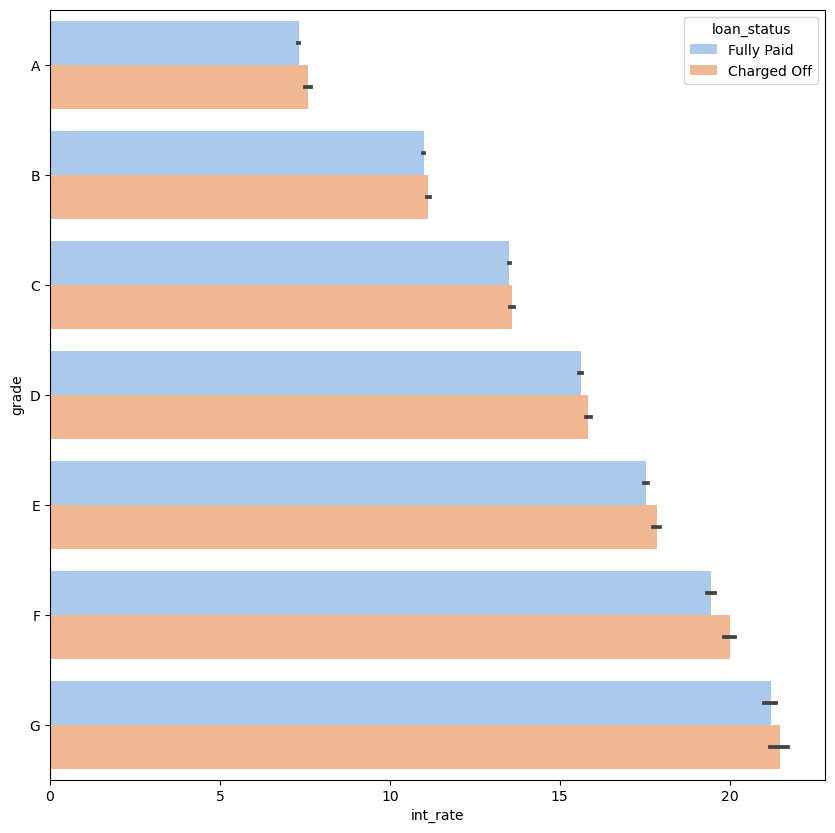

In [188]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<Figure size 640x480 with 0 Axes>

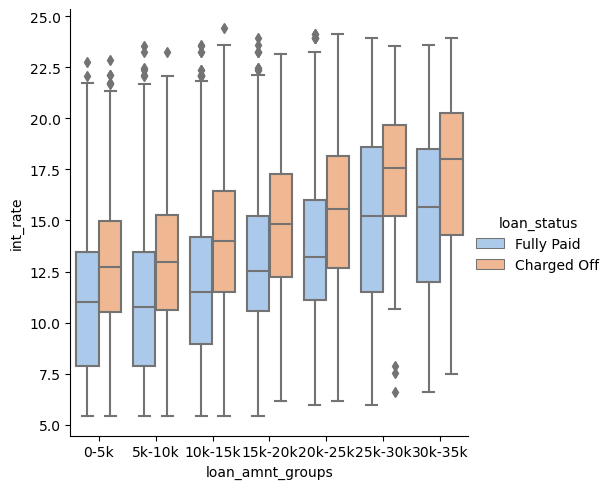

In [190]:
plt.tight_layout()
sns.catplot(data =loan_data,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="pastel",kind = 'box')

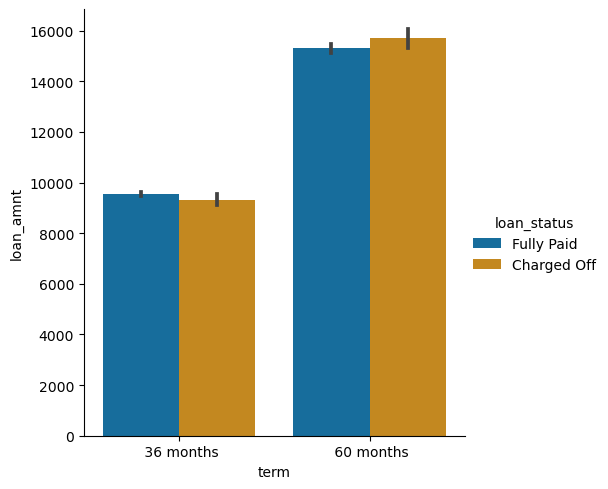

In [191]:
sns.catplot(x = 'term', y = 'loan_amnt', data = loan_data,hue = 'loan_status', kind = 'bar')